In [1]:
! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.5 MB/s eta 0:0

In [3]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
import google.generativeai as genai
from google.colab import userdata

In [7]:
import os
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

### Text Generation

In [14]:
model = genai.GenerativeModel(model_name = "gemini-2.0-flash")
model

genai.GenerativeModel(
    model_name='models/gemini-2.0-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

### Use LangChain to Access Gemini API

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

## Chat with Documents using RAG (Retreival Augment Generation)

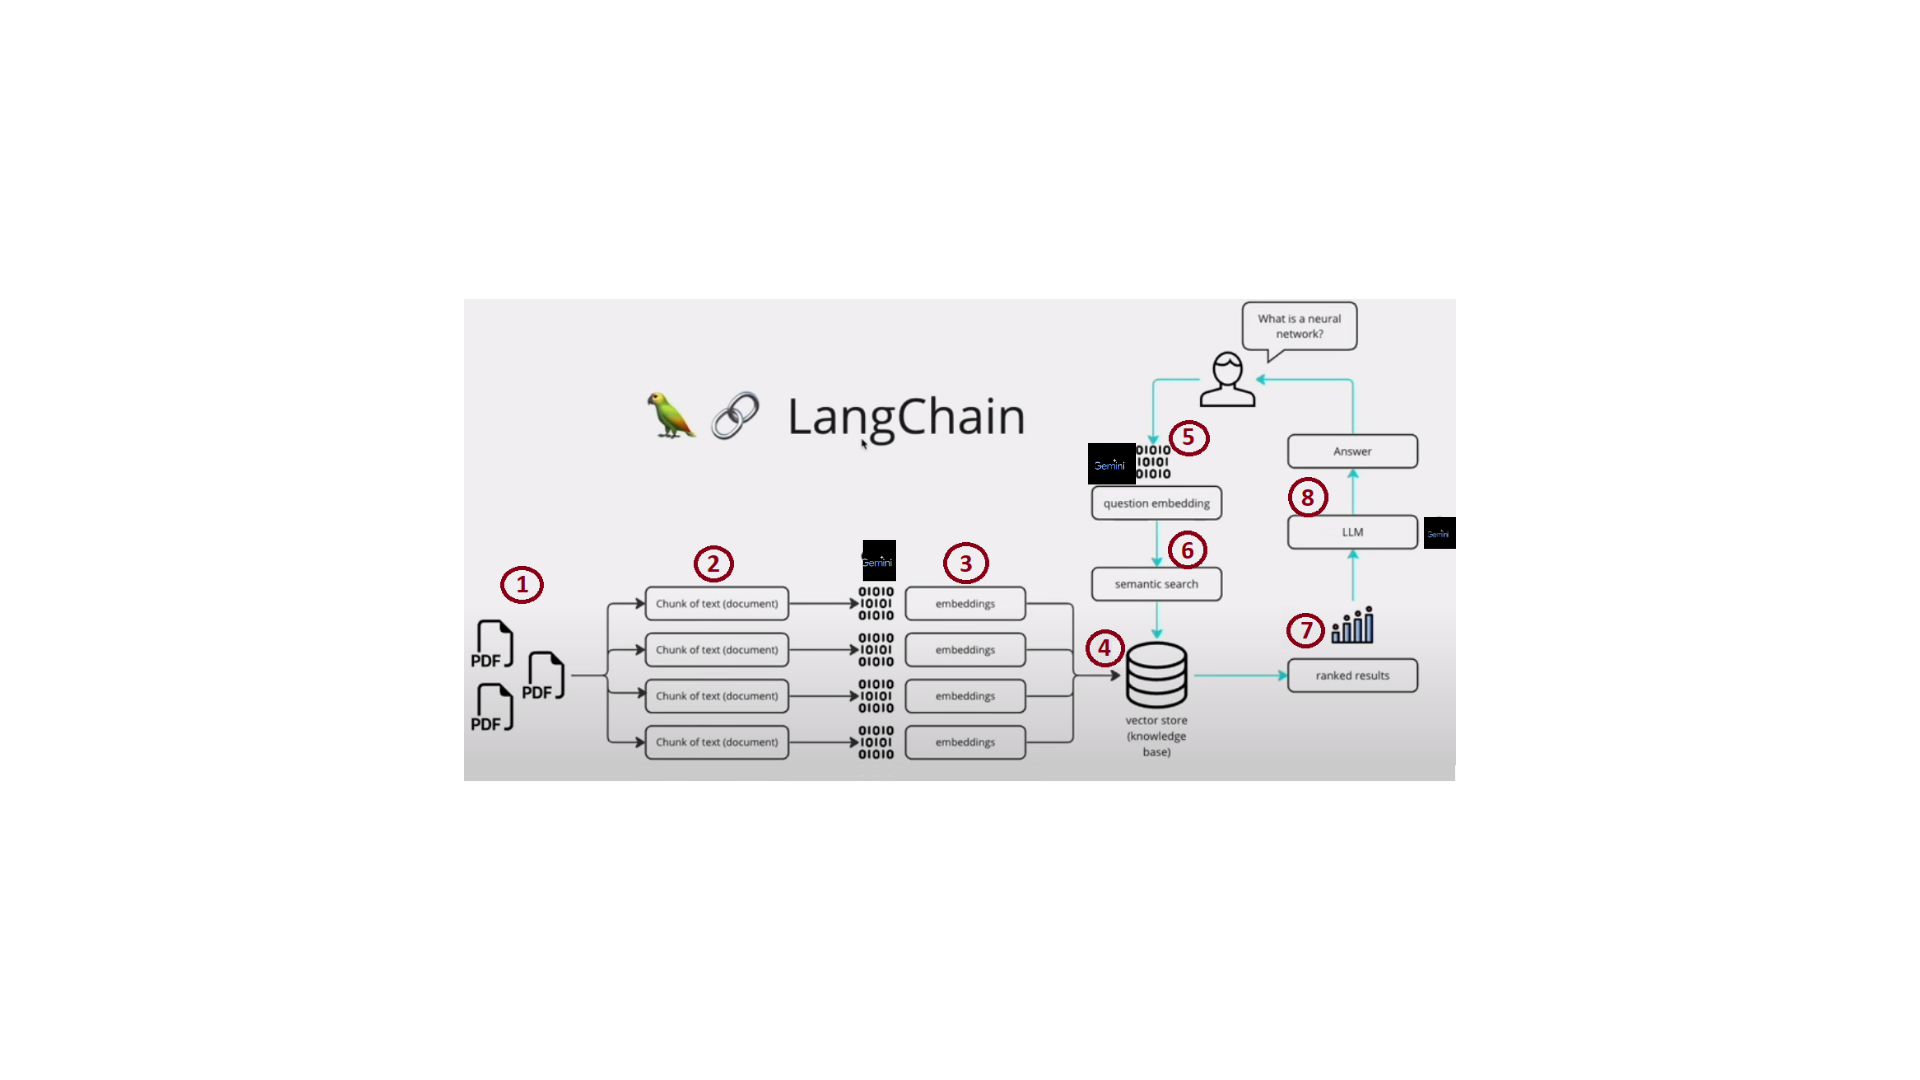

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/rag.png')
img

In [18]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 29 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 125044 files and directories

In [21]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00


In [22]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [23]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [36]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash",google_api_key=GOOGLE_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True)


### Extract text from the PDF

In [37]:
pdf_loader = PyPDFLoader("/content/kelm103.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)


63
UNIT NAME
EXPERIMENT
Stop the stop-watch/clock, at the count n (say, 20 or 25) of
oscillations, i.e., just when n oscillations are complete. For better
results, n should be chosen such that the time taken for n
oscillations is 50 s or more. Read, the total time (t) taken by the
bob for n oscillations. Repeat this observation a few times by noting
the time for same number ( n) of oscillations. Take the mean of
these readings.  Compute the time for one oscillation, i.e., the time
period T ( = t
/n) of the pendulum.
7. Change the length of the pendulum, by about 10 cm. Repeat the
step 6 again for finding the time (t) for about 20 oscillations or
more for the new length and find the mean time period. Take 5 or
6 more observations for different lengths of penduLum and find
mean time period in each case.
8. Record observations in the tabular form with proper units and
significant figures.
9. Take effective length L along x-axis and T 2 (or T) along y-axis,
using the observed values from T

In [38]:
len(pages)

14

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### RAG Pipeline: Embedding + Gemini (LLM)

In [40]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [41]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [42]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [43]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})


In [44]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)

In [46]:
question = "Explain me the formula to calculate length of simple pendulum defined in the experiment?"
result = qa_chain({"query": question})
result["result"]

'Based on the provided text, the effective length (L) of the simple pendulum is calculated as:\n\nL = l + r + e\n\nWhere:\n\n*   l = length of the string from the top of the bob to the hook\n*   r = radius of the bob\n*   e = length of the hook'

In [47]:
Markdown(result["result"])

Based on the provided text, the effective length (L) of the simple pendulum is calculated as:

L = l + r + e

Where:

*   l = length of the string from the top of the bob to the hook
*   r = radius of the bob
*   e = length of the hook

In [45]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

'I am sorry, but this document does not contain the answer to your question about the multi-head attention layer.'

In [48]:
Markdown(result["result"])

Based on the provided text, the effective length (L) of the simple pendulum is calculated as:

L = l + r + e

Where:

*   l = length of the string from the top of the bob to the hook
*   r = radius of the bob
*   e = length of the hook

In [ ]:
result["source_documents"]

[Document(page_content='Attention Visualizations\nInput-Input Layer5\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nFigure 3: An example of the attention mechanism following long-distance dependencies in the\nencoder self-attention in layer 5 of 6. Many of the attention heads attend to a distant dependency of\nthe verb ‘making’, completing the phrase ‘making...more difficult’. Attentions here shown only for\nthe word ‘making’. Different colors represent different heads. Best viewed in color.\n13\n\nInput-Input Layer5\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould

In [52]:
template = """Use the following pieces of context to answer the
question at the end. While presenting, say "Based on the experiment" in the begining.
If you don't know the answer, just say that you don't know,
 don't try to make up an answer. Keep the answer as concise as possible.
 Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [53]:
question = """Explain me the formula to calculate The time period
 of a simple pendulum for oscillations of small amplitude?"""
result = qa_chain({"query": question})
result["result"]

'Based on the experiment, the time period (T) of a simple pendulum for oscillations of small amplitude is given by the relation T = 2π√(L/g), where L is the length of the pendulum, and g is the acceleration due to gravity at the place of experiment.\n\nThanks for asking!'

In [54]:
Markdown(result["result"])

Based on the experiment, the time period (T) of a simple pendulum for oscillations of small amplitude is given by the relation T = 2π√(L/g), where L is the length of the pendulum, and g is the acceleration due to gravity at the place of experiment.

Thanks for asking!

In [58]:
question = """Explain me the L vs T^2 graph in the experiment ?"""
result = qa_chain({"query": question})
Markdown(result["result"])

Based on the experiment, the L versus T squared graph is a straight line passing through the origin.

Thanks for asking!

In [60]:
question = """Explain me the L vs T^2 graph in the experiment more elaborately for 5 marks?"""
result = qa_chain({"query": question})
Markdown(result["result"])

Based on the experiment, the L vs T² graph is a straight line passing through the origin. This indicates a direct proportionality between the effective length (L) of the pendulum and the square of its time period (T²). This relationship is derived from the formula T² = (4π²/g) * L, where 4π²/g is a constant. The slope of the graph represents 4π²/g, which can be used to determine the acceleration due to gravity (g). The straight-line nature of the graph validates the theoretical relationship and confirms that the simple pendulum approximates Simple Harmonic Motion (SHM) for small oscillations.

Thanks for asking!

In [61]:
question = """what was my last question and your response?"""
result = qa_chain({"query": question})
Markdown(result["result"])

Based on the experiment, I don't know. Thanks for asking!

In [55]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

"Based on the experiment, I don't know the answer. Thanks for asking!"

In [56]:
Markdown(result["result"])

Based on the experiment, I don't know the answer. Thanks for asking!

In [57]:
question = "Describe Random forest?"
result = qa_chain({"query": question})
Markdown(result["result"])

Based on the experiment, I don't know. Thanks for asking!